TÌM HIỂU KÍCH THƯỚC KHUÔN MẶT TRONG BỘ DỮ LIỆU

In [1]:
import os

# Thư mục chứa ảnh
image_dir = "../data/images"
image_paths = []

# Duyệt qua các thư mục con và thêm đường dẫn các tệp hình ảnh vào danh sách
for root, dirs, files in os.walk(image_dir):
    for file in files:
        # Kiểm tra nếu tệp là một tệp hình ảnh
        if os.path.splitext(file)[1].lower() in ('.jpg', '.jpeg', '.png'):
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# In số lượng tệp hình ảnh
print("Số lượng tệp hình ảnh: ", len(image_paths))

Số lượng tệp hình ảnh:  3007


In [10]:
from deepface import DeepFace
from tqdm import tqdm

widths = []
heights = []

for path in tqdm(image_paths):
    results = DeepFace.extract_faces(img_path=path, detector_backend='ssd', enforce_detection=False, align=False)
    if len(results) > 0 and results[0]['confidence'] > 0:
        w = results[0]['facial_area']['w']
        h = results[0]['facial_area']['h']
        widths.append(w)
        heights.append(h)
        # print("({}x{})".format(w, h))

100%|██████████| 3007/3007 [03:24<00:00, 14.69it/s]


In [11]:
import numpy as np

# Tính toán min, max, trung bình cho chiều rộng và chiều cao
min_width = np.min(widths)
max_width = np.max(widths)
mean_width = np.mean(widths)
min_height = np.min(heights)
max_height = np.max(heights)
mean_height = np.mean(heights)

# In kết quả
print("Chiều rộng: Min={}, Max={}, Mean={}".format(min_width, max_width, round(mean_width)))
print("Chiều cao: Min={}, Max={}, Mean={}".format(min_height, max_height, round(mean_height)))

Chiều rộng: Min=43, Max=1872, Mean=227
Chiều cao: Min=54, Max=2752, Mean=303


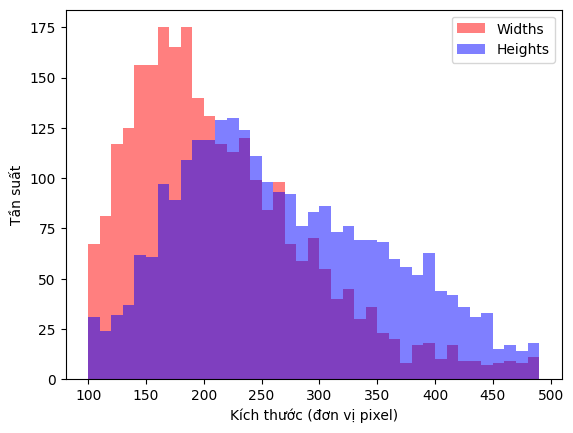

In [22]:
import matplotlib.pyplot as plt

bins = range(100, 500, 10)

# Vẽ histogram cho widths và đặt màu là đỏ (red)
plt.hist(widths, bins=bins, color='red', alpha=0.5, label='Widths')

# Vẽ histogram cho heights và đặt màu là xanh (blue)
plt.hist(heights, bins=bins, color='blue', alpha=0.5, label='Heights')

plt.xlabel("Kích thước (đơn vị pixel)")
plt.ylabel("Tần suất")
plt.legend()
plt.show()


In [23]:
# Xem số lượng ảnh và phân bố trong bộ dữ liệu

import os
import matplotlib.pyplot as plt
import numpy as np

# Thư mục chứa các thư mục ảnh
image_dir = "../data/faces"

# Đếm số lượng ảnh và thư mục con
num_images = 0
num_folders = 0
empty_folders = 0
image_counts = []
for folder in os.listdir(image_dir):
    if os.path.isdir(os.path.join(image_dir, folder)):
        folder_images = len(os.listdir(os.path.join(image_dir, folder)))
        if folder_images > 0:
            num_folders += 1
        else:
            empty_folders += 1
        image_counts.append(folder_images)
        num_images += folder_images

print("Số lượng ảnh: ", num_images)
print("Số lượng thư mục con: ", num_folders)
print("Số lượng thư mục rỗng: ", empty_folders)

# Lọc các thư mục không chứa ảnh
non_empty_counts = [count for count in image_counts if count > 0]

max_images = max(non_empty_counts)
min_images = min(non_empty_counts)
avg_images = np.mean(non_empty_counts)

print("Số lượng ảnh tối đa: ", max_images)
print("Số lượng ảnh tối thiểu: ", min_images)
print("Số lượng ảnh trung bình: ", round(avg_images))


Số lượng ảnh:  2996
Số lượng thư mục con:  135
Số lượng thư mục rỗng:  0
Số lượng ảnh tối đa:  41
Số lượng ảnh tối thiểu:  15
Số lượng ảnh trung bình:  22


In [3]:
# đổi tên tệp hàng loạt
import os

# Thư mục chứa ảnh
image_dir = "../data/faces"

for i, folder in enumerate(os.listdir(image_dir)):
    folder_path = os.path.join(image_dir, folder)
    for j, image in enumerate(os.listdir(folder_path)):
        # Tạo tên mới cho tệp
        new_name = "{}-{:03d}{}".format(folder, j + 1, os.path.splitext(image)[-1])
        # Tạo đường dẫn mới cho tệp
        new_path = os.path.join(folder_path, new_name)
        # Đổi tên tệp
        os.rename(os.path.join(folder_path, image), new_path)
